In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split

import preprocessing
import pickle
import models
import evaluation
import fusion


/tmp/ipykernel_11340/1517023904.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


A continuación se muestra como se eligieron los modelos que se propusieron.

#  Datos de entrenamiento

In [2]:
# Cargamos los datos de entrenamiento
datos = pd.read_csv("training.csv")
datos

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_540,Feature_541,Feature_542,Feature_543,Feature_544,Feature_545,Feature_546,Feature_547,Feature_548,Target
0,0.144231,0.105263,0.9000,0.66665,0.93750,0.0,0.0,NaN,NaN,0.56250,...,0.216696,0.0000,0.000000,Orcs,0.3,0.00,0.294118,0.111111,0.0,0
1,0.115385,0.000000,0.8750,0.00000,0.94000,0.0,0.0,0.000000,0.028192,0.56000,...,0.058615,0.0105,0.000000,Goblins,0.1,1.00,0.235294,0.222222,1.0,0
2,0.076923,0.000000,0.8750,0.50000,0.86665,0.0,1.0,0.000000,0.027882,0.63335,...,0.000000,0.0000,0.263682,Uruk-hai,0.4,0.00,0.117647,0.222222,0.0,0
3,0.076923,0.000000,0.8750,0.00000,0.71430,0.0,0.0,0.000000,NaN,0.78570,...,0.000000,0.0000,0.000000,Goblins,0.0,1.00,0.117647,0.222222,0.0,0
4,0.528846,0.263158,0.9375,0.87500,0.93135,0.0,1.0,0.000000,0.027882,0.56865,...,0.033748,0.0130,0.094527,Uruk-hai,0.3,1.00,0.117647,0.666667,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2558,0.096154,0.000000,0.7500,0.00000,0.88890,0.0,0.0,0.000000,0.027882,0.61110,...,0.000000,0.0000,0.000000,Nazgul,0.2,0.00,0.000000,0.000000,0.0,1
2559,0.115385,0.000000,1.0000,0.00000,1.00000,0.0,1.0,0.000000,0.027882,0.50000,...,0.085258,0.0000,0.119403,Goblins,0.3,0.75,0.117647,0.222222,1.0,0
2560,0.096154,0.000000,1.0000,1.00000,0.87500,0.0,1.0,0.000000,0.244122,0.62500,...,0.000000,0.0000,0.000000,Balrog,0.2,0.00,0.000000,0.333333,0.0,0
2561,0.105769,0.000000,1.0000,0.87500,1.00000,0.0,0.0,0.000000,0.027882,0.50000,...,0.000000,0.0000,0.000000,Uruk-hai,0.0,0.00,0.000000,0.222222,0.0,0


Reducimos el conjunto de entrenamiento a las features más significativas que encontramos

In [3]:
worst_features = preprocessing.read_pickle('worst_features.pkl')
datos = preprocessing.clean_data(datos, worst_features)
datos

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,...,Feature_537,Feature_539,Feature_540,Feature_541,Feature_542,Feature_544,Feature_546,Feature_547,Feature_548,Target
0,0.144231,0.105263,0.9000,0.66665,0.93750,0.0,NaN,NaN,0.56250,0.166667,...,0.00,0.161290,0.216696,0.0000,0.000000,0.3,0.294118,0.111111,0.0,0
1,0.115385,0.000000,0.8750,0.00000,0.94000,0.0,0.000000,0.028192,0.56000,0.250000,...,0.00,0.225806,0.058615,0.0105,0.000000,0.1,0.235294,0.222222,1.0,0
2,0.076923,0.000000,0.8750,0.50000,0.86665,1.0,0.000000,0.027882,0.63335,0.083333,...,0.00,0.258065,0.000000,0.0000,0.263682,0.4,0.117647,0.222222,0.0,0
3,0.076923,0.000000,0.8750,0.00000,0.71430,0.0,0.000000,NaN,0.78570,0.416667,...,0.00,0.258065,0.000000,0.0000,0.000000,0.0,0.117647,0.222222,0.0,0
4,0.528846,0.263158,0.9375,0.87500,0.93135,1.0,0.000000,0.027882,0.56865,0.583333,...,0.00,0.548387,0.033748,0.0130,0.094527,0.3,0.117647,0.666667,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2558,0.096154,0.000000,0.7500,0.00000,0.88890,0.0,0.000000,0.027882,0.61110,0.166667,...,0.00,0.064516,0.000000,0.0000,0.000000,0.2,0.000000,0.000000,0.0,1
2559,0.115385,0.000000,1.0000,0.00000,1.00000,1.0,0.000000,0.027882,0.50000,0.166667,...,0.25,0.161290,0.085258,0.0000,0.119403,0.3,0.117647,0.222222,1.0,0
2560,0.096154,0.000000,1.0000,1.00000,0.87500,1.0,0.000000,0.244122,0.62500,0.083333,...,0.00,0.064516,0.000000,0.0000,0.000000,0.2,0.000000,0.333333,0.0,0
2561,0.105769,0.000000,1.0000,0.87500,1.00000,0.0,0.000000,0.027882,0.50000,0.083333,...,0.00,0.032258,0.000000,0.0000,0.000000,0.0,0.000000,0.222222,0.0,0


# División de datos

In [4]:
X = datos.drop(['Target'], axis=1).copy()
y = datos['Target'].copy()
# Particion de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43, stratify=y)
print(len(X_train))
print(len(X_test))
print(len(X_train) + len(X_test))

1794
769
2563


# Modelos

Los modelos con los que se trabajo fueron:

1. Modelo 1: Lightgbm
2. Modelo 2: SVM
3. Modelo 3: Red neuronal
4. Modelo 4: Random Forest

A continuación se entrenan cada uno de los modelos y se obtienen los respectivos scores. Todos los modelos implementados se encuentran en el script models.py.

## Neural network

In [5]:
model_nn = models.get_nn(X_train, y_train, X_test, y_test, 100, 64)
probs_nn = models.predict_nn(model_nn, X_test)

Epoch 1/100


2023-12-18 01:56:23.082561: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-12-18 01:56:23.082838: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-18 01:56:23.086140: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2023-12-18 01:56:23.173403: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-12-18 01:56:23.173890: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2994405000 Hz


29/29 [==============================] - 2s 44ms/step - loss: 1.5144 - accuracy: 0.7862 - val_loss: 0.9698 - val_accuracy: 0.8921
Epoch 2/100
29/29 [==============================] - 0s 9ms/step - loss: 0.8511 - accuracy: 0.8952 - val_loss: 0.5668 - val_accuracy: 0.8921
Epoch 3/100
29/29 [==============================] - 0s 10ms/step - loss: 0.5018 - accuracy: 0.8987 - val_loss: 0.3600 - val_accuracy: 0.8921
Epoch 4/100
29/29 [==============================] - 0s 12ms/step - loss: 0.3276 - accuracy: 0.8949 - val_loss: 0.2533 - val_accuracy: 0.8921
Epoch 5/100
29/29 [==============================] - 0s 9ms/step - loss: 0.2392 - accuracy: 0.8919 - val_loss: 0.1953 - val_accuracy: 0.8921
Epoch 6/100
29/29 [==============================] - 0s 15ms/step - loss: 0.2007 - accuracy: 0.8818 - val_loss: 0.1616 - val_accuracy: 0.8921
Epoch 7/100
29/29 [==============================] - 0s 9ms/step - loss: 0.1527 - accuracy: 0.8968 - val_loss: 0.1420 - val_accuracy: 0.8921
Epoch 8/100
29/29 [==

Epoch 59/100
29/29 [==============================] - 0s 6ms/step - loss: 0.1048 - accuracy: 0.8902 - val_loss: 0.0984 - val_accuracy: 0.8921
Epoch 60/100
29/29 [==============================] - 0s 7ms/step - loss: 0.1065 - accuracy: 0.8911 - val_loss: 0.0984 - val_accuracy: 0.8921
Epoch 61/100
29/29 [==============================] - 0s 7ms/step - loss: 0.1027 - accuracy: 0.8905 - val_loss: 0.0985 - val_accuracy: 0.8921
Epoch 62/100
29/29 [==============================] - 0s 6ms/step - loss: 0.0999 - accuracy: 0.8938 - val_loss: 0.0989 - val_accuracy: 0.8921
Epoch 63/100
29/29 [==============================] - 0s 7ms/step - loss: 0.1003 - accuracy: 0.8937 - val_loss: 0.0984 - val_accuracy: 0.8921
Epoch 64/100
29/29 [==============================] - 0s 7ms/step - loss: 0.0945 - accuracy: 0.8983 - val_loss: 0.0983 - val_accuracy: 0.8921
Epoch 65/100
29/29 [==============================] - 0s 7ms/step - loss: 0.1170 - accuracy: 0.8807 - val_loss: 0.0982 - val_accuracy: 0.8921
Epoch 

## Lightgbm

In [6]:
model_lgbm = models.get_lgbm(X_train, y_train, X_test, y_test)
probs_lgbm = models.predict_lgbm(model_lgbm, X_test)

## SVM

In [7]:
model_svm = models.get_svm(X_train, y_train)
probs_svm = models.predict_svm(model_svm, X_test)

## Random Forest

In [8]:
model_rf = models.get_rf(X_train, y_train)
probs_rf = models.predict_rf(model_rf, X_test)

# Score-fusion

El enfoque que se utilizó fue ver el problema como un problema de clasificación multimodal (aunque realmente el modelo que se usó durante la evaluación final se reduce a un ensamble de votación), sin embargo, inicialmente se pensó en implementar varias estrategias de fusión, viendo a cada modelo entrenado como un tipo de modalidad. 

En Multimodal Classification FUsion in Real-World Scenarios, se llega a la conclusión de que en algunos casos una fusión tardía (a nivel de decisión) tiene mejores resultados que un fusión a nivel de características.


La idea de hacer una fusión a nivel de decisiones es robustecer y complementar los modelos entrenados, para ello en el script fusion.py se implementa una función que determina que fusión de modelos logra minimizar la métrica brier_score.

In [9]:
best_combination, best_model_names, best_brier_score = fusion.select_best_combination(y_test,
                                                                                      probs_1 = probs_lgbm, 
                                                                                      probs_2 = probs_svm, 
                                                                                      probs_3 = probs_nn, 
                                                                                      probs_4 = probs_rf)
best_model_names

('probs_1',)
0.09932132942716329
('probs_2',)
0.09451532202734361
('probs_3',)
0.09630790382103681
('probs_4',)
0.09666762028608583
('probs_1', 'probs_2')
0.09393278353961607
('probs_1', 'probs_3')
0.09432846833114274
('probs_1', 'probs_4')
0.09433767372199828
('probs_2', 'probs_3')
0.0951406830393666
('probs_2', 'probs_4')
0.09422955679662569
('probs_3', 'probs_4')
0.09515713844513847
('probs_1', 'probs_2', 'probs_3')
0.09371813159610644
('probs_1', 'probs_2', 'probs_4')
0.09327730938804084
('probs_1', 'probs_3', 'probs_4')
0.09366625205098134
('probs_2', 'probs_3', 'probs_4')
0.09451318522111742
('probs_1', 'probs_2', 'probs_3', 'probs_4')
0.09343005402326829


('probs_1', 'probs_2', 'probs_4')

De los resultados obtenidos, se puede observar que se logra obtener un mejor brier-score al combinar las probabilidades de los modelos lgbm, svm y rf. De esta manera se obtiene un primer modelo.

## ¿Cómo combinamos los modelos?

En la parte anterior se realizó un promedio de las probabilidades de cada modelo y así se obtuvo un modelo más robusto. Sin embargo, podríamos plantearnos que no todos los modelos tienen la misma importancia, para eso podríamos asignar pesos a cada modelo, más aún, podríamos buscar los pesos que  optimizan la métrica brier score al hacer la fusión, por lo tanto se tendría:

$$ prob_{fusion} = w_1*prob_1 + w_2*prob_2 + w_3*prob_3 + ... + w_n*prob_n$$

donde  $$ \sum_{i=1}^{n} w_i = 1$$

Una manera de hacerlo sería utilizar una red neuronal que minimice el brier-score a partir de la probabilidad obtenida de la fusión.

Otra alternativa sería utilizar Logarithmic Opinion Pool, y ver si mejora los resultados de las probabilidades.

# Calibración del modelo

El objetivo de la fusionar los scores de cada modelo individual y ver que combinación mejora el brier-score radica en un objetivo final: tener un modelo robusto y calibrado.

Text(0.5, 1.0, 'FDP for classifiers')

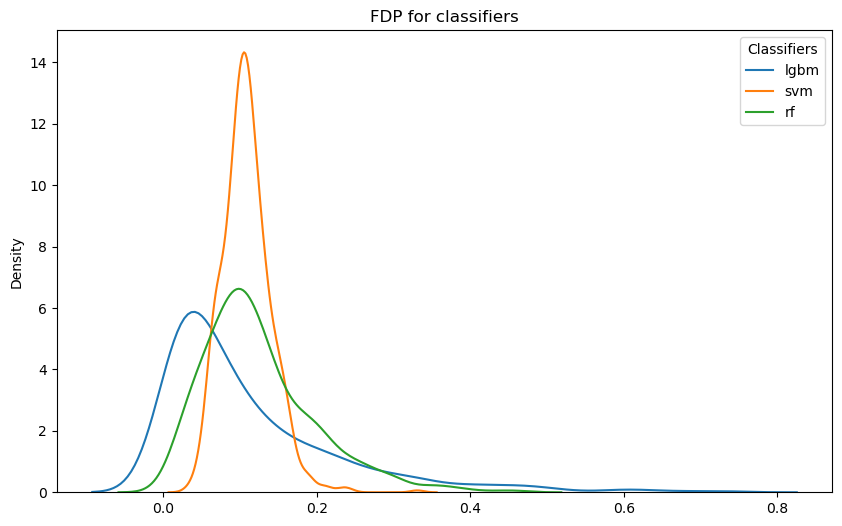

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.figure(figsize=(10,6))
sns.kdeplot(probs_lgbm, label='lgbm')
sns.kdeplot(probs_svm, label='svm')
#sns.kdeplot(probs_nn, label='nn')
sns.kdeplot(probs_rf, label='rf')
#sns.kdeplot(best_probs, labesl='svm-lgbm-rf')
plt.legend(title='Classifiers', loc='upper right')
plt.title('FDP for classifiers')

Text(0.5, 1.0, 'FDP for classifiers')

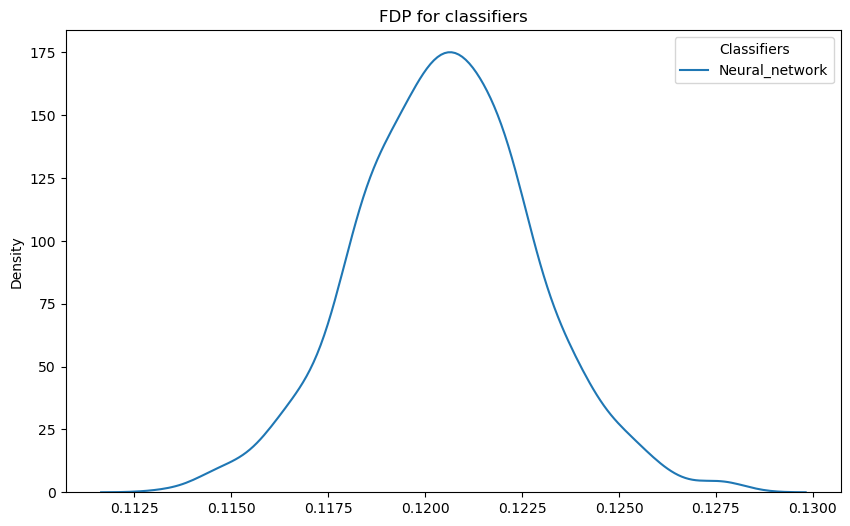

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(10,6))
sns.kdeplot(probs_nn, label='Neural_network')
plt.legend(title='Classifiers', loc='upper right')
plt.title('FDP for classifiers')

Text(0.5, 1.0, 'FDP for classifiers')

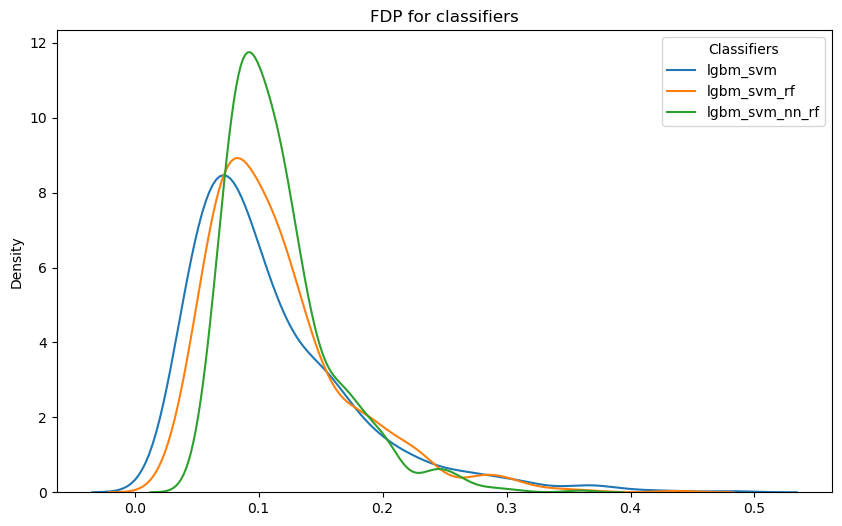

In [17]:
plt.figure(figsize=(10,6))
sns.kdeplot((probs_lgbm+probs_svm)/2, label='lgbm_svm')
sns.kdeplot((probs_lgbm+probs_svm+probs_rf)/3, label='lgbm_svm_rf')
sns.kdeplot((probs_lgbm+probs_svm+probs_nn+probs_rf)/4, label='lgbm_svm_nn_rf')

plt.legend(title='Classifiers', loc='upper right')
plt.title('FDP for classifiers')

Text(0.5, 1.0, 'FDP for classifiers')

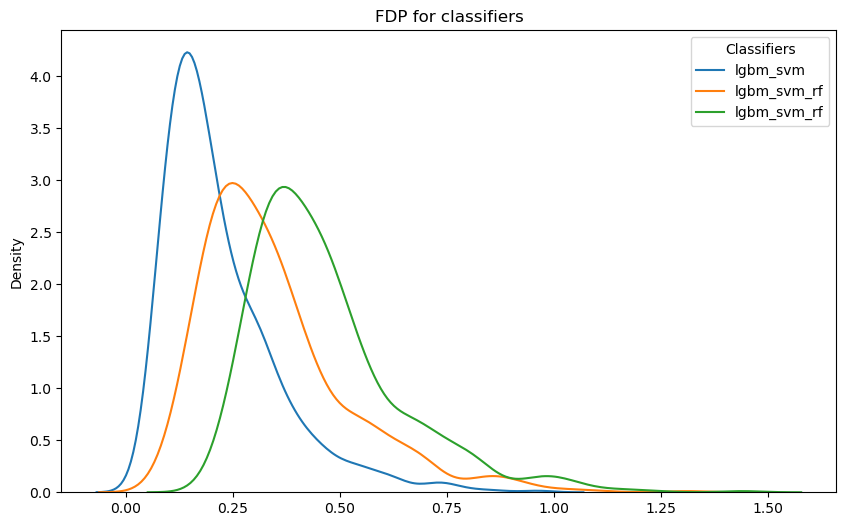

In [18]:
plt.figure(figsize=(10,6))
sns.kdeplot((probs_lgbm+probs_svm), label='lgbm_svm')
sns.kdeplot((probs_lgbm+probs_svm+probs_rf), label='lgbm_svm_rf')
sns.kdeplot((probs_lgbm+probs_svm+probs_nn+probs_rf), label='lgbm_svm_rf')

plt.legend(title='Classifiers', loc='upper right')
plt.title('FDP for classifiers')

A partir de los modelos fusionados, se puede observar ligeramente una pequeña clasifiación bimodal, que es justamente lo que queremos (y lo que mejoraría el brier-score), sin embargo, implementando las calibraciones de scikitlearn no se obtuvienro buenos resultados. Una de las ideas pero que ya no se logró implementar bien, fue crear una función de calibracion. A partir de la fusión de los modelos, identificar el umbral que divide a la fdp en dos distribuciones, de esta manera se podría tener un modelo bien calibrado.

# Predicciones para el envío

In [19]:
data_validation = pd.read_csv("data_evaluation.csv")
# Exploramos nuestra base de datos
data_validation

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_539,Feature_540,Feature_541,Feature_542,Feature_543,Feature_544,Feature_545,Feature_546,Feature_547,Feature_548
0,0.100840,0.000000,0.83335,0.50000,0.83335,0.0,0.0,0.013889,0.584524,0.66665,...,0.208333,0.000000,0.703611,0.000000,Nazgul,0.333333,0.4286,0.111111,0.285714,0.8571
1,0.075630,0.153846,1.00000,0.75000,0.93335,0.0,1.0,0.000000,0.031636,0.56665,...,0.125000,0.215190,0.000000,0.000000,Orcs,0.111111,0.6667,0.444444,0.285714,1.0000
2,0.142857,0.000000,0.75000,0.75000,0.95455,0.0,1.0,1.000000,0.576362,0.54545,...,0.125000,0.000000,0.000000,0.000000,Goblins,0.000000,0.0000,0.333333,0.000000,0.0000
3,0.050420,0.000000,0.00000,0.00000,0.00000,0.0,1.0,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,Goblins,0.111111,0.0000,0.333333,0.285714,0.0000
4,0.025210,0.000000,1.00000,1.00000,0.86365,0.0,0.0,0.000000,0.031636,0.63635,...,0.208333,0.436709,0.000000,0.234694,Orcs,0.111111,0.0000,0.222222,0.142857,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,0.109244,0.000000,0.75000,0.66665,0.90000,0.0,0.0,0.013889,0.031636,0.60000,...,0.166667,0.000000,0.000000,0.000000,Nazgul,0.000000,0.0000,0.222222,0.428571,0.0000
523,0.092437,0.000000,0.50000,0.83335,0.50000,0.0,0.0,0.000000,0.031636,1.00000,...,0.375000,0.000000,0.752373,0.367347,Orcs,0.111111,0.0000,0.111111,0.285714,0.0000
524,0.092437,0.076923,0.00000,1.00000,0.00000,0.0,0.0,0.000000,0.061437,0.00000,...,0.125000,0.000000,0.000000,0.000000,Ringwraiths,0.000000,0.0000,0.000000,0.571429,0.0000
525,0.058824,0.000000,0.00000,1.00000,0.00000,0.0,1.0,0.000000,0.031636,0.00000,...,0.166667,0.000000,0.000000,0.000000,Orcs,0.333333,0.0000,0.111111,0.142857,1.0000


In [20]:
X_val = preprocessing.clean_data(data_validation, worst_features)
X_val

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,...,Feature_536,Feature_537,Feature_539,Feature_540,Feature_541,Feature_542,Feature_544,Feature_546,Feature_547,Feature_548
0,0.100840,0.000000,0.83335,0.50000,0.83335,0.0,0.013889,0.584524,0.66665,0.333333,...,0.000000,0.2857,0.208333,0.000000,0.703611,0.000000,0.333333,0.111111,0.285714,0.8571
1,0.075630,0.153846,1.00000,0.75000,0.93335,1.0,0.000000,0.031636,0.56665,0.222222,...,0.000000,0.3333,0.125000,0.215190,0.000000,0.000000,0.111111,0.444444,0.285714,1.0000
2,0.142857,0.000000,0.75000,0.75000,0.95455,1.0,1.000000,0.576362,0.54545,0.333333,...,0.186047,0.0000,0.125000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.0000
3,0.050420,0.000000,0.00000,0.00000,0.00000,1.0,0.000000,0.000000,0.00000,0.222222,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.111111,0.333333,0.285714,0.0000
4,0.025210,0.000000,1.00000,1.00000,0.86365,0.0,0.000000,0.031636,0.63635,0.111111,...,0.000000,0.0000,0.208333,0.436709,0.000000,0.234694,0.111111,0.222222,0.142857,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,0.109244,0.000000,0.75000,0.66665,0.90000,0.0,0.013889,0.031636,0.60000,0.111111,...,0.000000,0.0000,0.166667,0.000000,0.000000,0.000000,0.000000,0.222222,0.428571,0.0000
523,0.092437,0.000000,0.50000,0.83335,0.50000,0.0,0.000000,0.031636,1.00000,0.333333,...,0.000000,0.0000,0.375000,0.000000,0.752373,0.367347,0.111111,0.111111,0.285714,0.0000
524,0.092437,0.076923,0.00000,1.00000,0.00000,0.0,0.000000,0.061437,0.00000,0.333333,...,0.441860,0.0000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.571429,0.0000
525,0.058824,0.000000,0.00000,1.00000,0.00000,1.0,0.000000,0.031636,0.00000,0.555556,...,0.000000,1.0000,0.166667,0.000000,0.000000,0.000000,0.333333,0.111111,0.142857,1.0000


In [21]:
probs_val_lgbm = models.predict_lgbm(model_lgbm, X_val)
probs_val_svm = models.predict_svm(model_svm, X_val)
probs_val_nn = models.predict_nn(model_nn, X_val)
probs_val_rf = models.predict_rf(model_rf, X_val)

# Prediccion 1

In [22]:
pred_1 = (probs_val_lgbm + probs_val_svm + probs_val_rf)/3
df_predicciones = pd.DataFrame({'predicciones': pred_1})
df_predicciones.to_csv('eval_gamma_1.csv', index=False)

# Prediccion 2

In [23]:
sum_lgbm_svm_rf = 0.099 + 0.094 + 0.096
w_lgbm = 0.099/ sum_lgbm_svm_rf
w_svm = 0.094/ sum_lgbm_svm_rf
w_rf = 0.096/ sum_lgbm_svm_rf

In [24]:
pred_2 = (w_lgbm*probs_val_lgbm + w_svm*probs_val_svm + w_rf*probs_val_rf)/3
pred_2

array([0.05902892, 0.05210326, 0.04842685, 0.04731342, 0.04598671,
       0.04157202, 0.05453393, 0.09722016, 0.04884224, 0.06019493,
       0.07130411, 0.08590651, 0.0542453 , 0.0542935 , 0.04828804,
       0.05847257, 0.05588364, 0.04609282, 0.06854758, 0.04326405,
       0.07085474, 0.05548922, 0.07492117, 0.06689239, 0.08432779,
       0.04080046, 0.06759103, 0.07103427, 0.04569777, 0.07205201,
       0.06328492, 0.13207475, 0.08509951, 0.06481962, 0.04597142,
       0.05875248, 0.06127676, 0.11569171, 0.06940833, 0.08931703,
       0.11237404, 0.09097867, 0.04922635, 0.04356702, 0.07312829,
       0.06193282, 0.09299399, 0.04651355, 0.05400479, 0.07159828,
       0.05945982, 0.06926015, 0.05659657, 0.05215273, 0.0424466 ,
       0.0570792 , 0.04870116, 0.05264961, 0.06303346, 0.05475028,
       0.11767859, 0.05955243, 0.05066008, 0.08047156, 0.05699904,
       0.07234129, 0.04959197, 0.06527924, 0.05333564, 0.0622537 ,
       0.06879525, 0.04315311, 0.07612473, 0.06455249, 0.05132

In [25]:
df_predicciones = pd.DataFrame({'predicciones': pred_2})
df_predicciones.to_csv('eval_gamma_2.csv', index=False)